Imports:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Item a)

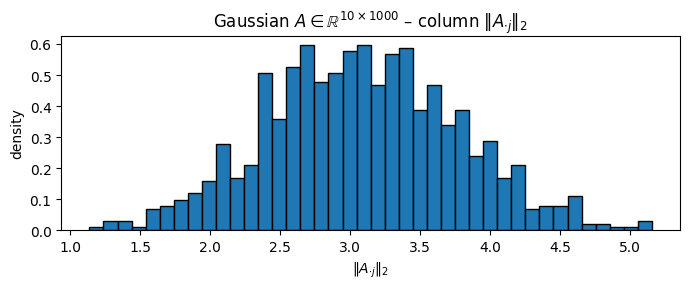

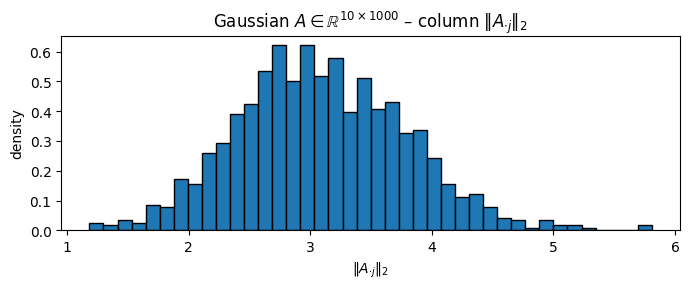

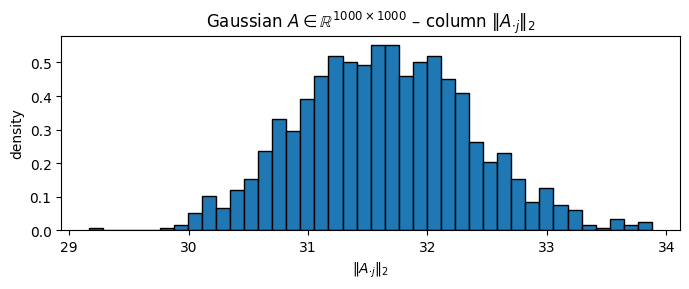

In [ ]:
def _parse_int_list(prompt: str) -> list[int]:
    
    """
    Repeatedly prompt the user until they provide a non-empty list of integers.

    Args:
        prompt (str): The prompt message to display to the user.

    Returns:
        list[int]: A list of integers entered by the user.

    Raises:
        ValueError: If the user input cannot be parsed into a non-empty list of integers.
    """

    while True:
        raw = input(prompt).strip()
        try:
            values = [int(x) for x in raw.replace(";", ",").split(",") if x]
            if not values:
                raise ValueError
            return values
        except ValueError:
            print("⚠️  Please enter a comma-separated list of integers (e.g. 10,20,50).")

def _make_hists(
    m_vals: list[int],
    n_vals: list[int],
    bins: int = 40,
    density: bool = True,
    seed: int | None = None
) -> None:
    
    """
    Generate and display a histogram for each (m, n) pair, where each histogram shows the distribution
    of column 2-norms of a random Gaussian matrix of shape (m, n).

    Args:
        m_vals (list[int]): List of row counts (m values) for the matrices.
        n_vals (list[int]): List of column counts (n values) for the matrices.
        bins (int, optional): Number of bins for the histogram. Defaults to 40.
        density (bool, optional): If True, plot probability density instead of count. Defaults to True.
        seed (int | None, optional): Random seed for reproducibility. Defaults to None.

    Returns:
        None

    Raises:
        ValueError: If m_vals or n_vals are empty.
    """

    rng = np.random.default_rng(seed)
    for m in m_vals:
        for n in n_vals:
            norms = np.linalg.norm(rng.standard_normal((m, n)), axis=0) #draw the gaussian matrix and compute column 2-norms

            plt.figure(figsize=(7, 3)) #one figure per (m, n) to keep it readable
            plt.hist(norms, bins=bins, density=density, edgecolor="black")
            plt.title(rf"Gaussian $A\in\mathbb{{R}}^{{{m}\times {n}}}$ – column $\|A_{{\cdot j}}\|_2$")
            plt.xlabel(r"$\|A_{\cdot j}\|_2$")
            plt.ylabel("density" if density else "count")
            plt.tight_layout()
            plt.show()

def main() -> None:
    fix_n = input("Do you want to **fix n and vary m**? [y/n] ").strip().lower()

    if fix_n == "y":
        n = int(input("Fixed n (number of columns): ").strip())
        m_vals = _parse_int_list("List the m values (rows), comma-separated: ")
        _make_hists(m_vals, [n])

    else:
        n_vals = _parse_int_list("List the n values (columns), comma-separated: ")
        m_vals = _parse_int_list("List the m values (rows), comma-separated: ")
        _make_hists(m_vals, n_vals)

main()
